In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/indian_liver_patient.csv')


In [ ]:
df.head(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [ ]:
print(df.describe())

              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529 

In [ ]:
print(df.isnull().sum())
df = df.dropna()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


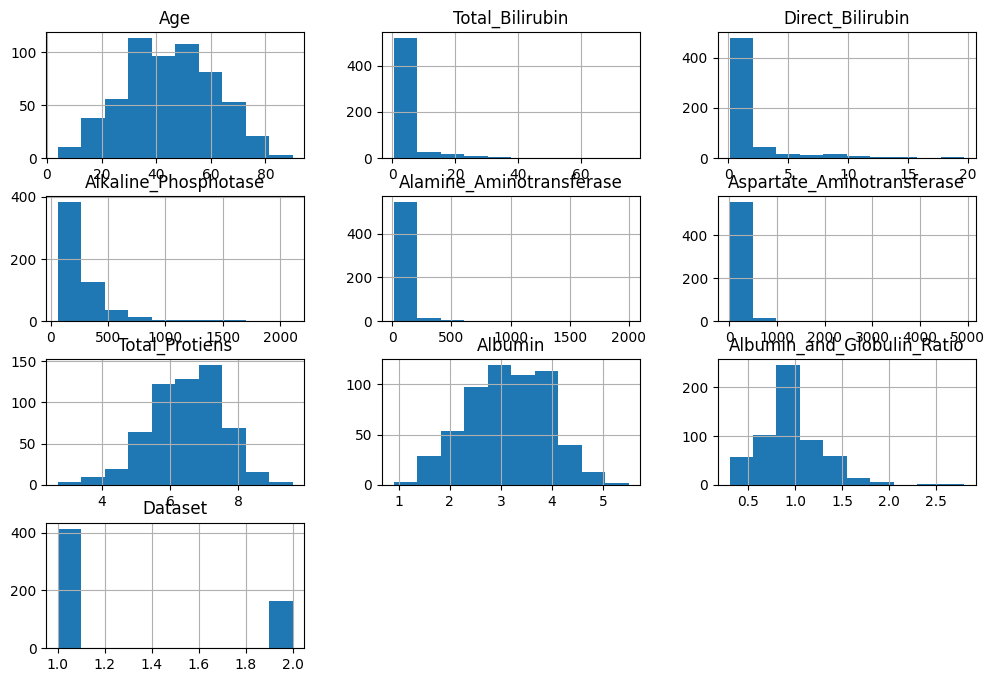

In [ ]:
df.hist(figsize=(12, 8))
plt.show()


In [ ]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

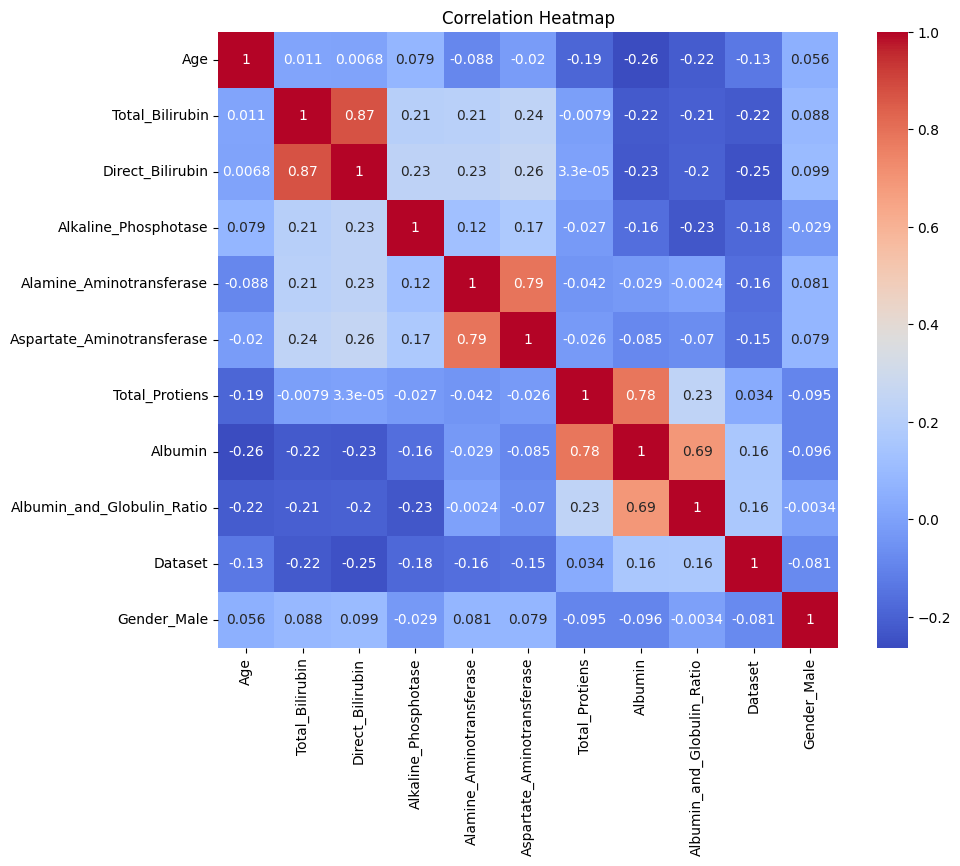

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(df.columns)

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',
       'Gender_Male'],
      dtype='object')


In [ ]:
group1 = df[df['Gender_Male'] == 1]['Age']
group2 = df[df['Gender_Male'] == 0]['Age']

t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 1.3444014083339957, P-value: 0.17934690877151466


In [ ]:
group1 = df[df['Gender_Male'] == 1]['Age']

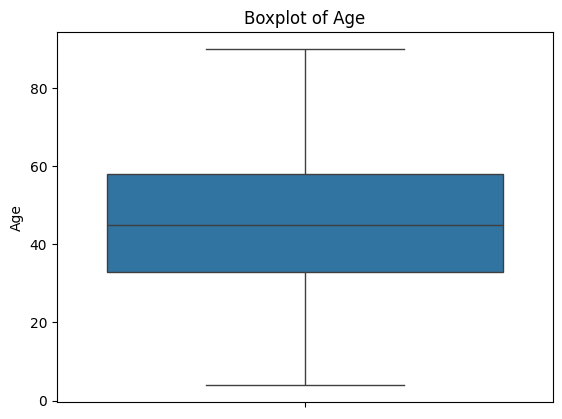

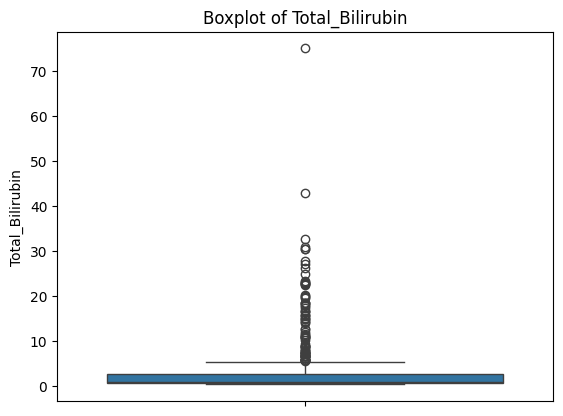

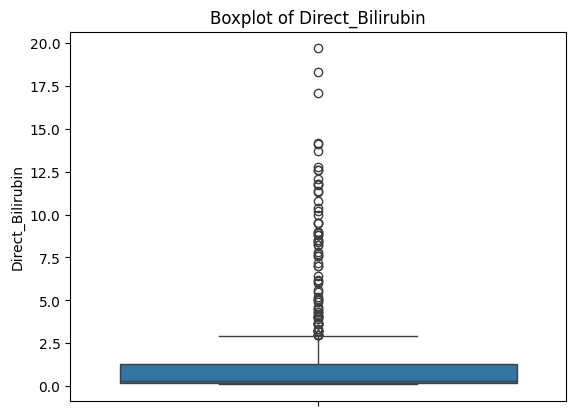

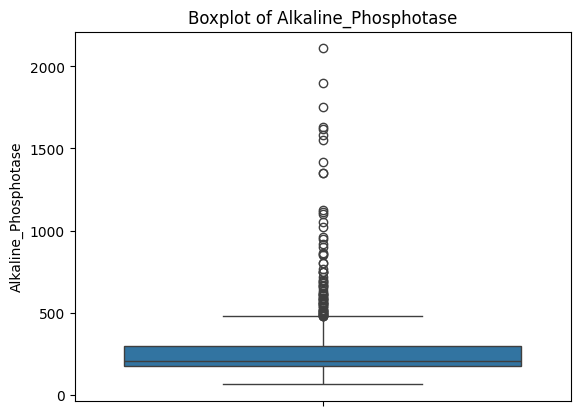

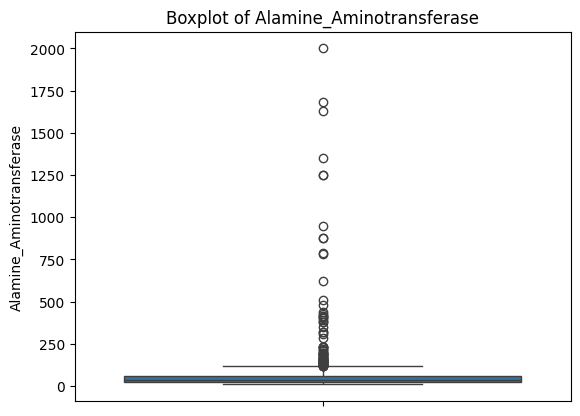

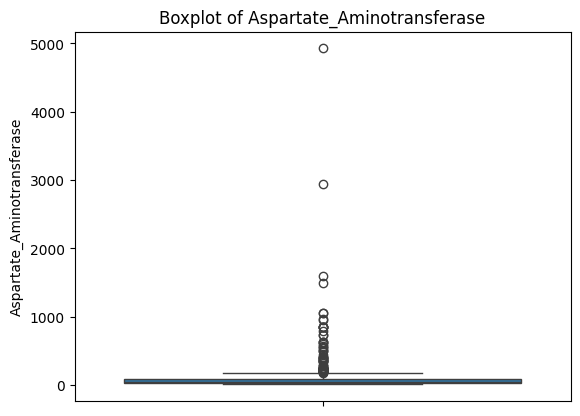

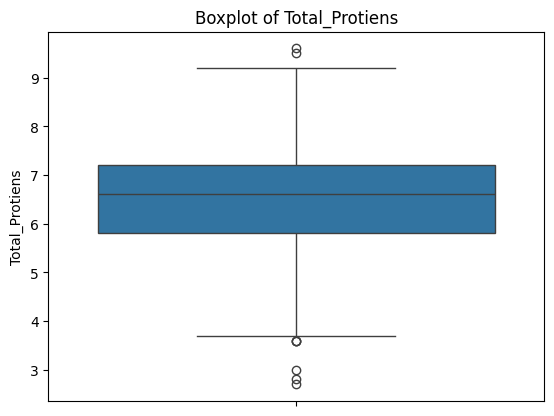

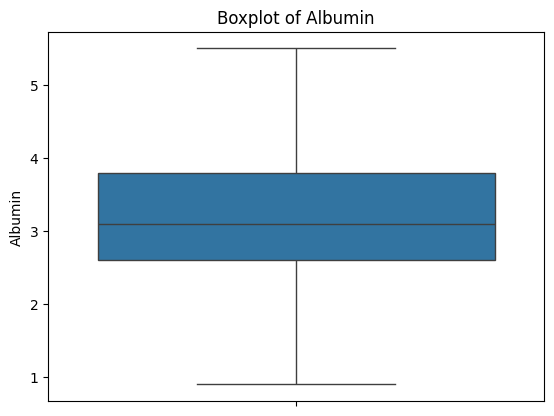

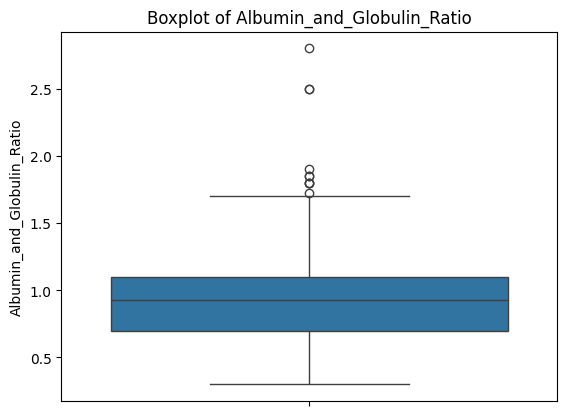

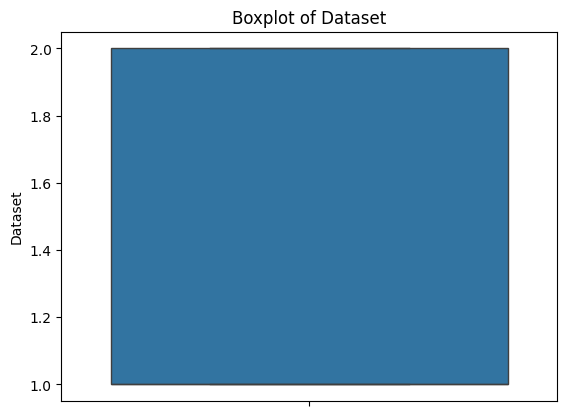

In [ ]:
for column in df.select_dtypes(include=np.number).columns:
    sns.boxplot(data=df, y=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

Number of patients diagnosed with liver disease:  414
Number of patients not diagnosed with liver disease:  165


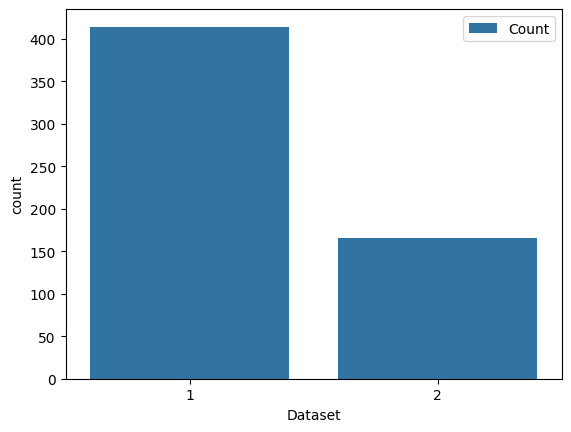

In [ ]:
# Plotting the Number of patients with liver disease vs Number of patients with no liver disease
sns.countplot(data=df, x = 'Dataset', label='Count')

LD, NLD =df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

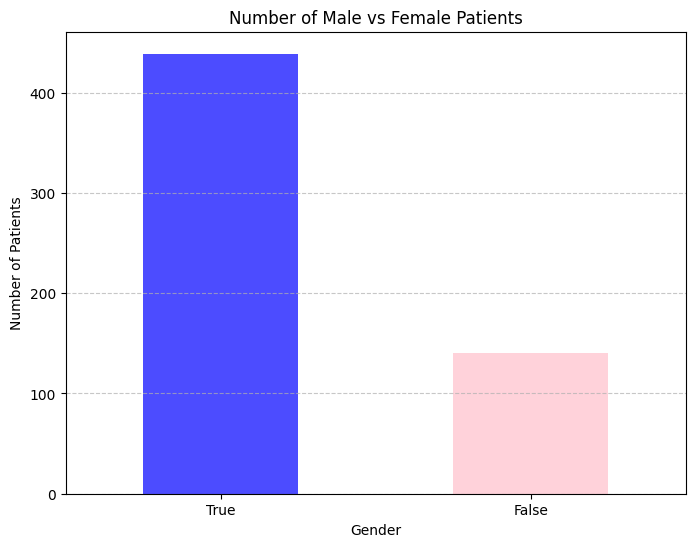

In [ ]:
gender_counts = df['Gender_Male'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title("Number of Male vs Female Patients")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

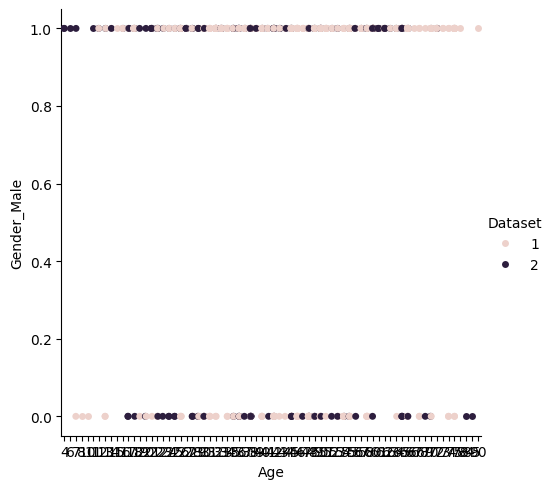

In [ ]:
# Plotting patient Age vs Gender
sns.catplot(x="Age", y="Gender_Male", hue="Dataset", data=df)

In [ ]:
df[['Gender_Male', 'Dataset','Age']].groupby(['Dataset','Gender_Male'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender_Male,Age
2,2,False,42.897959
3,2,True,40.715517
0,1,False,43.329670
1,1,True,46.938080


Text(0.5, 0.98, 'Disease by Gender and Age')

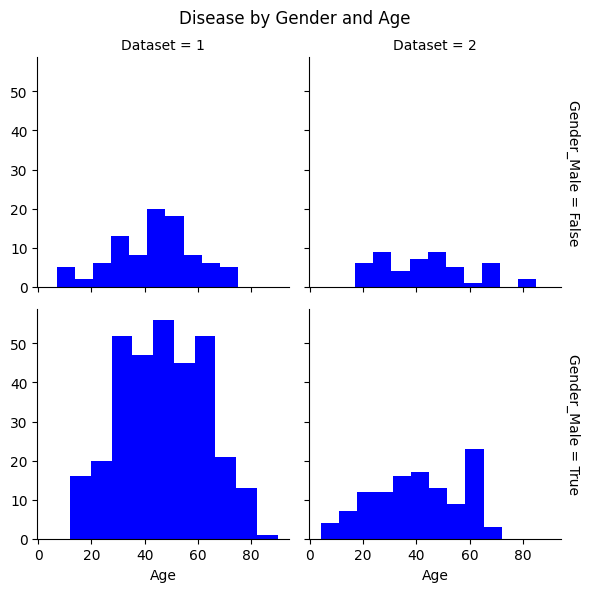

In [ ]:
# Plotting Age vs Gender
g = sns.FacetGrid(df, col="Dataset", row="Gender_Male", margin_titles=True)
g.map(plt.hist, "Age", color="blue")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

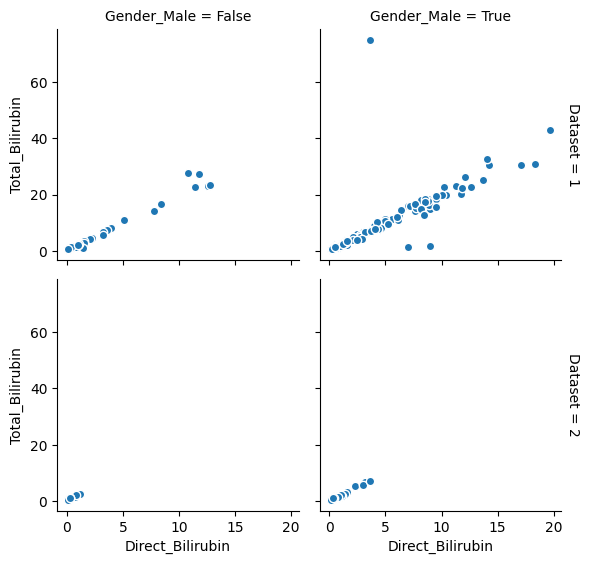

In [ ]:
# Plotting Gender(Male/Female) along with Total_Bilirubin and Direct_Bilirubin
g = sns.FacetGrid(df, col="Gender_Male", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

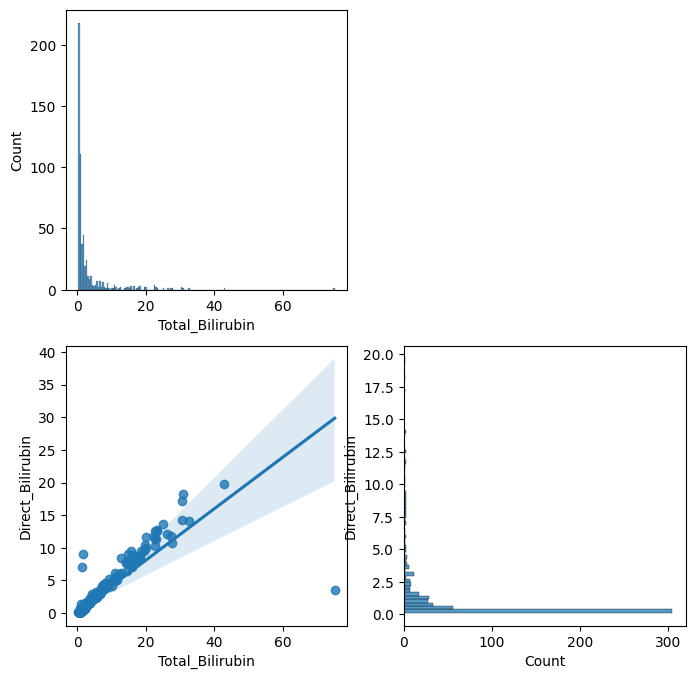

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Regression plot on the main diagonal
sns.regplot(x="Total_Bilirubin", y="Direct_Bilirubin", data=df, ax=axs[1, 0])

# Histograms on the off-diagonals
sns.histplot(df["Total_Bilirubin"], ax=axs[0, 0])
sns.histplot(y=df["Direct_Bilirubin"], ax=axs[1, 1])  # Use y for vertical orientation

# Remove the upper right subplot
fig.delaxes(axs[0, 1])

# Show the plot
plt.show()

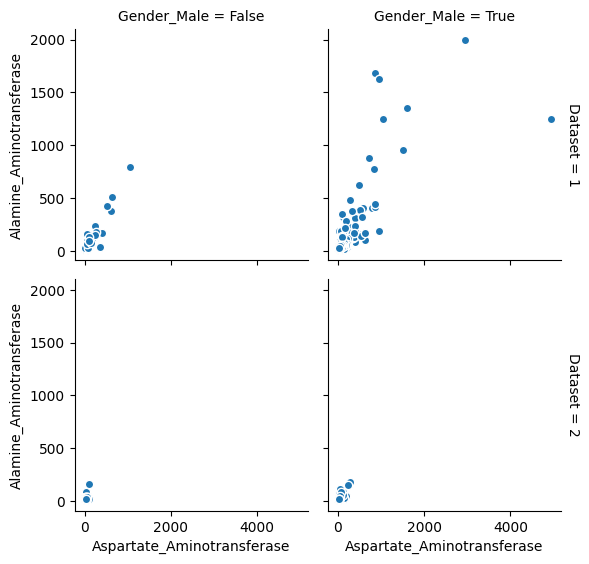

In [ ]:
# Plotting Gender(Male/Female) along with Aspartate Aminotransferase, Alamine Aminotransferase
g = sns.FacetGrid(df, col="Gender_Male", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

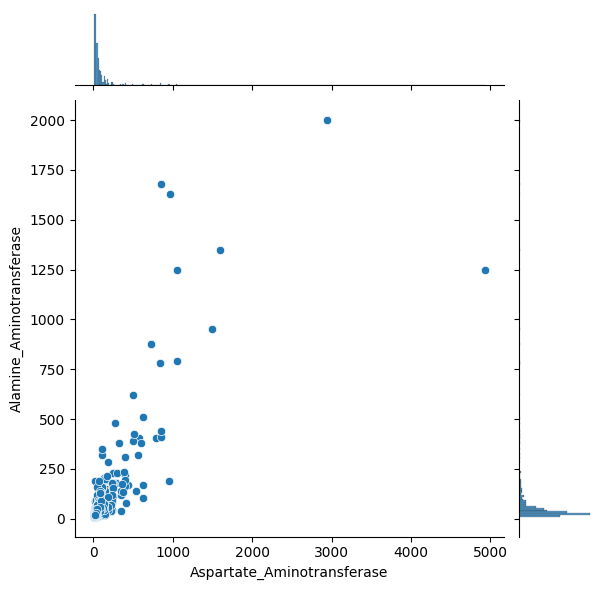

In [ ]:
# Plotting Aspartate_Aminotransferase vs Alamine_Aminotransferase
g = sns.JointGrid(data=df, x="Aspartate_Aminotransferase", y="Alamine_Aminotransferase")

# Plot a scatter plot on the joint axes
g.plot_joint(sns.scatterplot)

# Plot histograms on the marginal axes
g.plot_marginals(sns.histplot)

# Show the plot
plt.show()

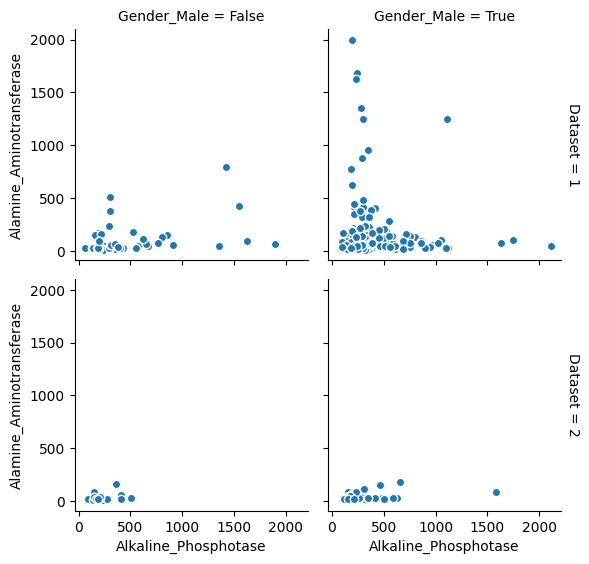

In [ ]:
# Plotting Gender(Male/Female) along with Alkaline_Phosphotase and Alamine_Aminotransferase
g = sns.FacetGrid(df, col="Gender_Male", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)